In [1]:
!gdown --id 1qgiszZ15cDFTTdeOZeUiuiht07PM2854

Downloading...
From: https://drive.google.com/uc?id=1qgiszZ15cDFTTdeOZeUiuiht07PM2854
To: /content/point_processing.jpg
100% 404k/404k [00:00<00:00, 52.9MB/s]


## **Point Processing**


Process each point by a function that depends ONLY the pixel’s value and that does not depend on the point’s neighbors.

**1. Linear Transformation: g(x, y) = a × f(x, y) + b**

*General*: Change the image’s intensity, cause the input bighter or darker.
    
* Users have to choose appropriate a and b (manually).

*Specific:*
* Create negative images.
* Convert to back-white image.

**2. Logarithmic Transformation: g(x, y) = a × log[1 + f(x, y)] + b**

*Input image:*

* Have some regions with too dark intensities (near 0)
* Have some regions with too bright intensities (near 255)

*Requirement:*

* Make dark regions brighter while keeping the intensity in bright regions lower than 255.
* Or, make bright regions darker while keeping the
intensity in dark regions lower than 0.

**3. Exponential Transformation: g(x, y) = a × e^f(x,y) + b**

Map small differences between two intensities in the input to a larger differences in the output image (contrast input images )

**4. Power-law Transformation:  g(x, y) = a × f(x, y)^γ + b**

Depend on γ, power-law transformation can be either

1. Linear transformation: for γ = 1
2. Log transformation: for γ < 1
3. Inverse-log transformation: for γ > 1

In [2]:
class PointProcessing:
    def __init__(self):
        return None

    def clip_image(self, image):
        return np.clip(image, 0, 255)

    def linear_transformation(self, image, alpha, beta):
        return self.clip_image(alpha * image + beta).astype(np.uint8)

    def logarithm_transformation(self, image, alpha, beta):
        return self.clip_image(alpha * np.log2(1 + image) + beta).astype(np.uint8)

    def exponential_transformation(self, image, alpha, beta):
        return self.clip_image(((alpha * np.exp(image / 255) + beta)) * 255).astype(np.uint8)

    def power_law_transformation(self, image, alpha, beta, gamma):
        return self.clip_image(((alpha * np.power(image / 255, gamma)) + beta) * 255).astype(np.uint8)

In [3]:
import cv2

image = cv2.imread('point_processing.jpg', 0)
point_process = PointProcessing()

### Test linear transformation

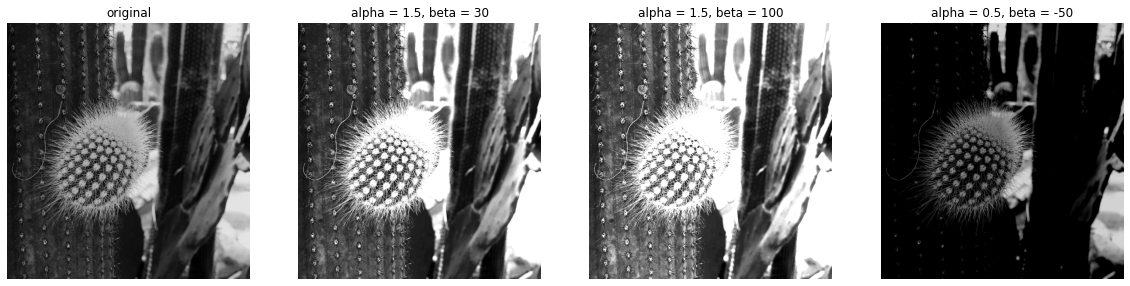

In [4]:
import matplotlib.pyplot as plt
import numpy as np

linear_transform_img1 = point_process.linear_transformation(image, 1.5, 30)
linear_transform_img2 = point_process.linear_transformation(image, 1.5, 100)
linear_transform_img3 = point_process.linear_transformation(image, 0.5, -50)

fig, ax = plt.subplots(1, 4, figsize=(20, 18))
ax[0].imshow(image, cmap="gray")
ax[0].axis("off")
ax[0].set_title("original", fontsize=12)

ax[1].imshow(linear_transform_img1, cmap="gray")
ax[1].axis("off")
ax[1].set_title("alpha = 1.5, beta = 30", fontsize=12)

ax[2].imshow(linear_transform_img2, cmap="gray")
ax[2].axis("off")
ax[2].set_title("alpha = 1.5, beta = 100", fontsize=12)

ax[3].imshow(linear_transform_img3, cmap="gray")
ax[3].axis("off")
ax[3].set_title("alpha = 0.5, beta = -50", fontsize=12)

plt.show()

### Test logarithm transformation

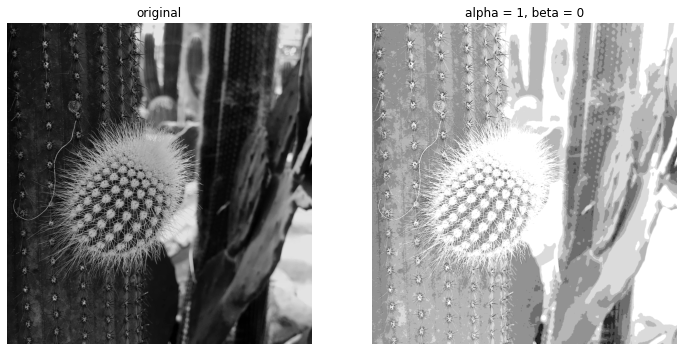

In [5]:
log_transform_img = point_process.logarithm_transformation(image, 1, 0)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image, cmap="gray")
ax[0].axis("off")
ax[0].set_title("original", fontsize=12)

ax[1].imshow(log_transform_img, cmap="gray")
ax[1].axis("off")
ax[1].set_title("alpha = 1, beta = 0", fontsize=12)

plt.show()

### Test exponential transformation

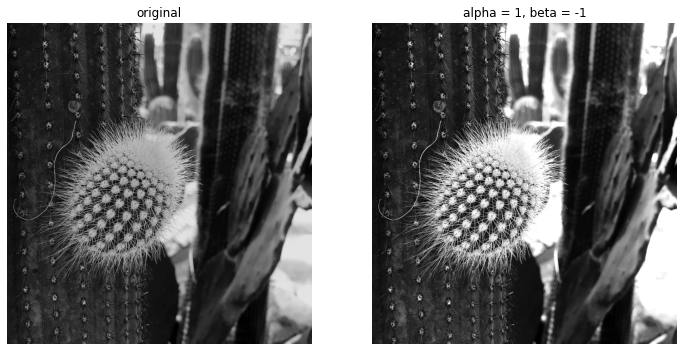

In [6]:
exp_transform_img = point_process.exponential_transformation(image, 1, -1)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image, cmap="gray")
ax[0].axis("off")
ax[0].set_title("original", fontsize=12)

ax[1].imshow(exp_transform_img, cmap="gray")
ax[1].axis("off")
ax[1].set_title("alpha = 1, beta = -1", fontsize=12)

plt.show()